#### Import Libraries

 
### INFO 5502- PRINCIPLES AND TECHNIQUES OF DATA SCIENCE
### Prof.Dr.Ting Xiao
### Group 6  
### WINE QUALITY PREDICTION


In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

#### Load Dataset

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Check the correlation for each of the fields

In [3]:
data.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Check correleation between the attributes using heatmap

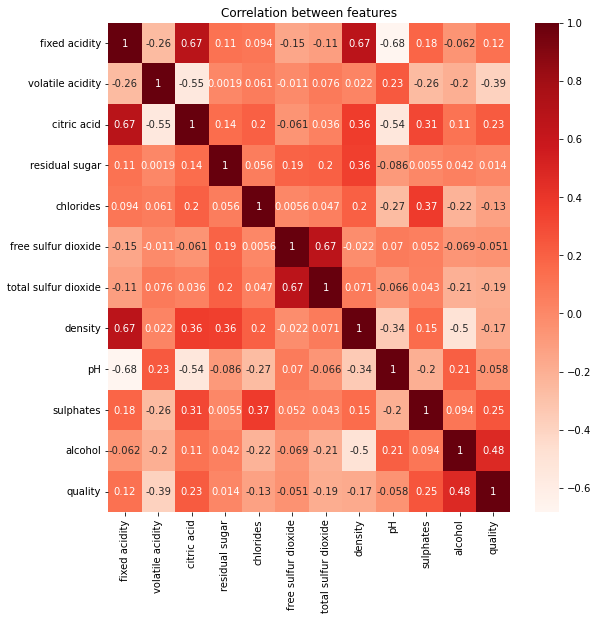

In [7]:
plt.figure(figsize=(9, 9))
correlation = data.corr()
heatmap = sns.heatmap(correlation, annot=True, cmap="Reds")
plt.title("Correlation between features")
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

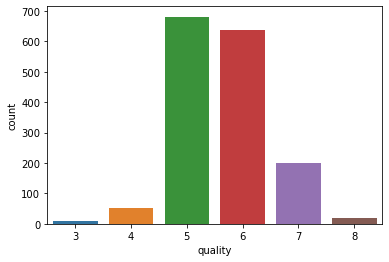

In [8]:
sns.countplot(x='quality', data=data)

Plot a boxplot to check for Outliers

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

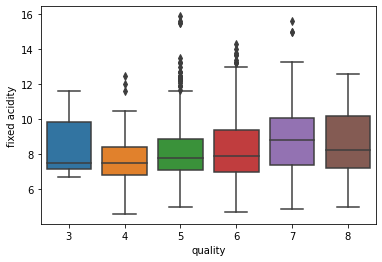

In [9]:
sns.boxplot('quality', 'fixed acidity', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

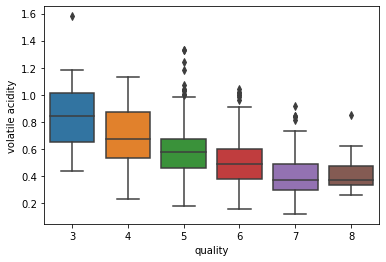

In [10]:
sns.boxplot('quality', 'volatile acidity', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

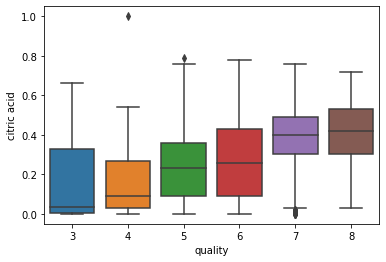

In [11]:
sns.boxplot('quality', 'citric acid', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

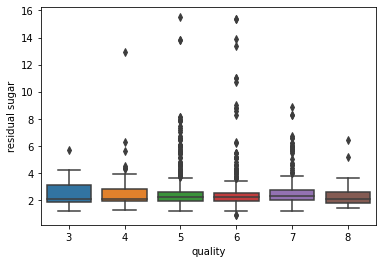

In [12]:
sns.boxplot('quality', 'residual sugar', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

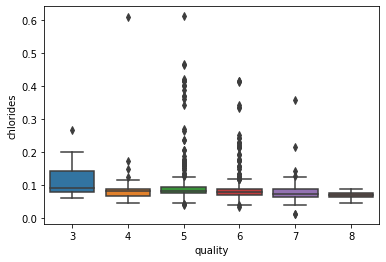

In [13]:
sns.boxplot('quality', 'chlorides', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

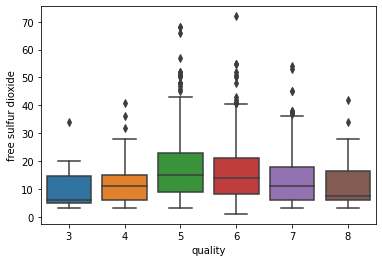

In [14]:
sns.boxplot('quality', 'free sulfur dioxide', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

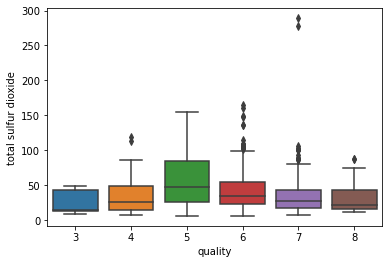

In [15]:
sns.boxplot('quality', 'total sulfur dioxide', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='density'>

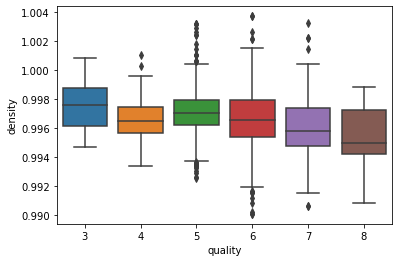

In [16]:
sns.boxplot('quality', 'density', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='pH'>

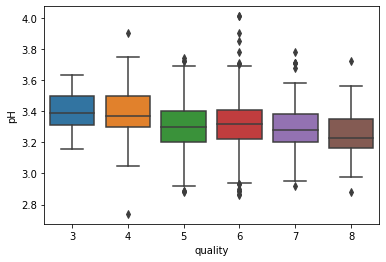

In [17]:
sns.boxplot('quality', 'pH', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

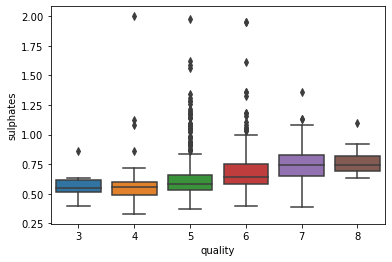

In [18]:
sns.boxplot('quality', 'sulphates', data = data)

C:\Users\LaptopCheckout\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

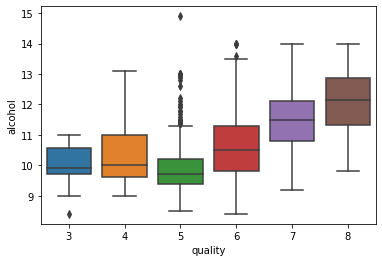

In [19]:
sns.boxplot('quality', 'alcohol', data = data)

In [20]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Categorizing the values into high or low quality

In [21]:
data['quality']=data.quality.apply(lambda x: "High Quality" if x>= 7 else "Low Quality")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low Quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low Quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low Quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Low Quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low Quality


#### Splitting the target and independent variable

In [22]:
x=data.iloc[:, 0:11].values
y=data['quality']

#### Label encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#### Split train and test data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1279, 11) (1279,)
(320, 11) (320,)


#### Standardization of features

In [26]:
scale=StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.transform(x_test)

### Logistic regression

In [27]:
lm = LogisticRegression(random_state=1)
lm.fit(x_train,y_train)
lm_predict = lm.predict(x_test)

#### Accuracy score

In [28]:
acc_score = accuracy_score(y_test,lm_predict)
print("Accuracy ",acc_score*100)

Accuracy  88.4375


#### Confusion matrix

In [29]:
lm_confusion_matrix = confusion_matrix(y_test,lm_predict)
print("Confusion Matrix \n",lm_confusion_matrix)

Confusion Matrix 
 [[  7  25]
 [ 12 276]]


### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

#### Accuracy score

In [31]:
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_acc_score*100)

89.375


#### Confusion matrix

In [32]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_conf_matrix

array([[ 19,  13],
       [ 21, 267]], dtype=int64)

### NaiveBayes

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

#### Accuracy score

In [34]:
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_acc_score*100)

81.875


#### confusion matrix

In [35]:
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_conf_matrix

array([[ 22,  10],
       [ 48, 240]], dtype=int64)

### RandomForest classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

#### Accuracy score

In [37]:
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

91.875


#### Confusion matrix

In [38]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_conf_matrix

array([[ 15,  17],
       [  9, 279]], dtype=int64)

### SVM Classifier

In [39]:
from sklearn.svm import SVC

lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

#### Accuracy score

In [40]:
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_acc_score*100)

91.875


#### Confusion matrix

In [41]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_conf_matrix

array([[ 15,  17],
       [  9, 279]], dtype=int64)